<a href="https://colab.research.google.com/github/amishnepal/proj1/blob/main/DLWP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

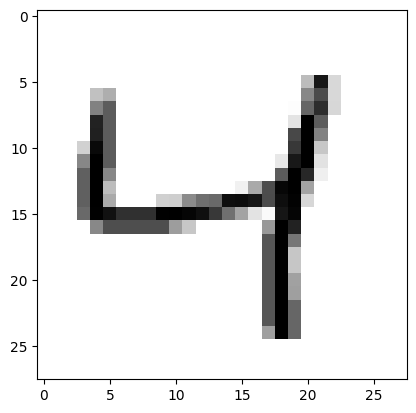

In [6]:
import matplotlib.pyplot as plt
img = train_images[2]
plt.imshow(img,cmap='gray_r')

In [7]:
from keras import models
from keras import layers
import numpy as np


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2640 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1060 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0700 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9882


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0596 - accuracy: 0.9815


In [15]:
test_acc

0.9815000295639038

In [16]:
import numpy as np
img = test_images[0]
img = (np.expand_dims(img, 0))
prediction = network.predict(img)
prediction

1/1 [==============================] - 0s 69ms/step


array([[3.7735170e-08, 3.9730172e-10, 4.3590062e-06, 9.5804025e-06,
        3.0223016e-12, 3.7028443e-09, 1.7859099e-12, 9.9998569e-01,
        6.8483523e-08, 2.8110102e-07]], dtype=float32)

In [17]:

predicted_label = np.argmax(prediction)
predicted_label

7

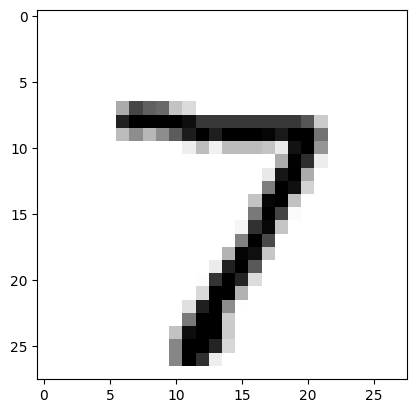

In [18]:
img = img.reshape(28, 28)
plt.imshow(img,cmap='gray_r')

In [19]:
imgs = test_images[:100]
#img = (np.expand_dims(img, 0))
predictions = network.predict(imgs)
#predictions

4/4 [==============================] - 0s 2ms/step


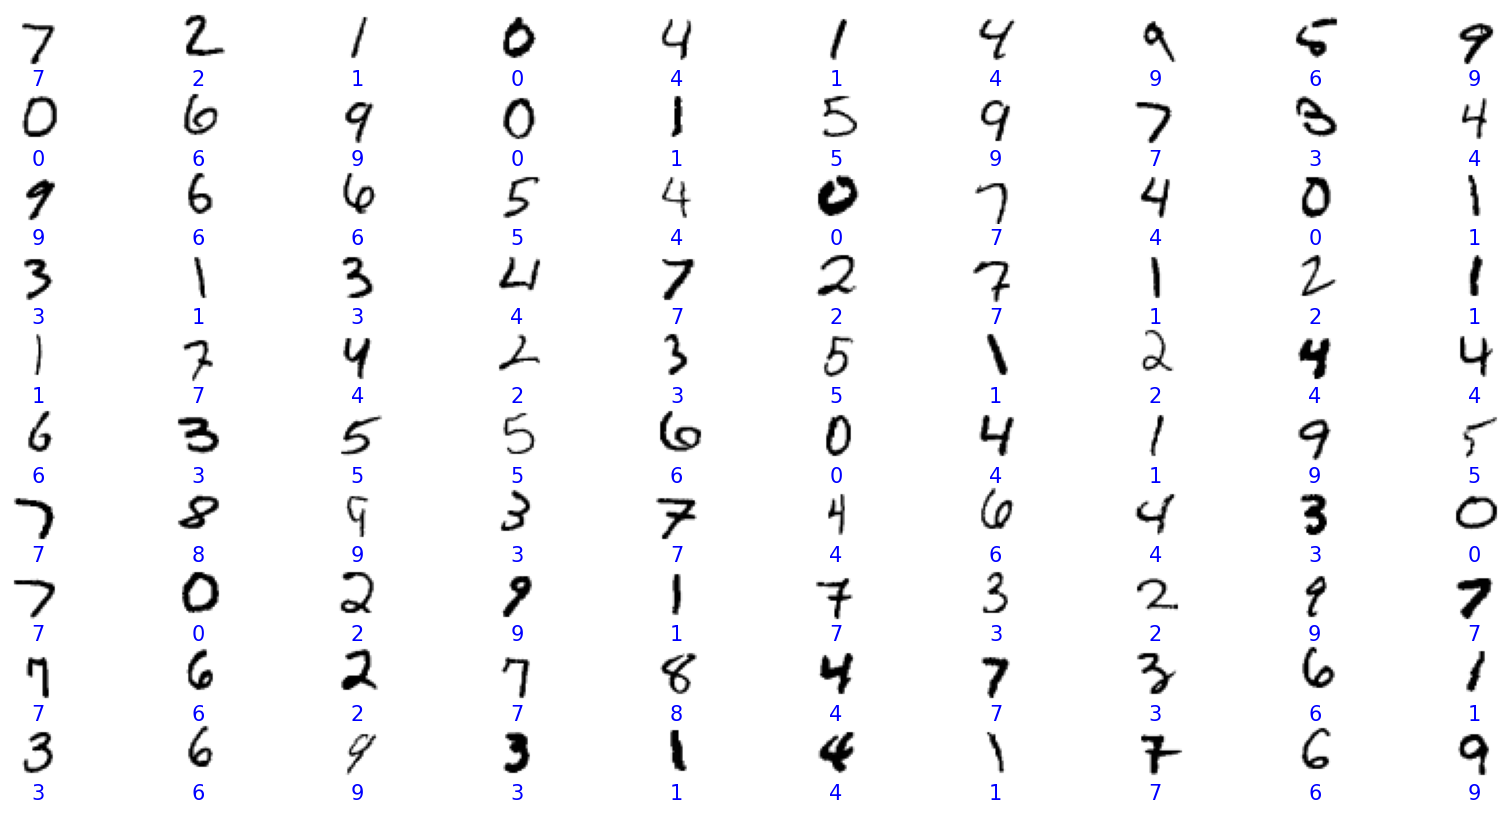

In [20]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(100):
    img = imgs[i].reshape(28, 28)
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.argmax(predictions[i])), fontsize=15, color='blue', ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray_r')